<a href="https://colab.research.google.com/github/AyyappaSwamyPanthadi/Twitter-sentiment-Analysis/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective

***The objective of this task is to detect the hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist/sexist setiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.***

In [0]:
train_link = "https://datahack-prod.s3.amazonaws.com/test_file/test_tweets_anuFYb8.csv"
test_link = "https://datahack-prod.s3.amazonaws.com/train_file/train_E6oV3lV.csv"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

%matplotlib inline

In [3]:
# Get train and test datasets
! wget "$train_link"
! wget "$test_link"

--2019-03-14 17:56:33--  https://datahack-prod.s3.amazonaws.com/test_file/test_tweets_anuFYb8.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.20
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1635543 (1.6M) [text/csv]
Saving to: ‘test_tweets_anuFYb8.csv’

test_tweets_anuFYb8 100%[===================>]   1.56M  1.06MB/s    in 1.5s    

2019-03-14 17:56:35 (1.06 MB/s) - ‘test_tweets_anuFYb8.csv’ saved [1635543/1635543]

--2019-03-14 17:56:38--  https://datahack-prod.s3.amazonaws.com/train_file/train_E6oV3lV.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.20
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103165 (3.0M) [text/csv]
Saving to: ‘train_E6oV3lV.csv’

train_E6oV3

In [0]:
# Load data to dataframe
df_train_data = pd.read_csv('./train_E6oV3lV.csv')
df_test_data = pd.read_csv('./test_tweets_anuFYb8.csv')

In [5]:
df_train_data.head()
#df_test_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [0]:
# Combining train set and test set to data preprocessing
df_combined = df_train_data.append(df_test_data, ignore_index=True)

In [0]:
# Method to remove pattern from pandas Series object
def remove_pattern(series_txt, pattern):
  series_txt = series_txt.str.replace(pattern, '')
  return series_txt

In [0]:
# Remove user handles from tweet
df_combined["cleaned_tweet"] = remove_pattern(df_combined["tweet"], "@[\w]*")

In [9]:
df_combined.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [0]:
# Remove punctuations, numbers and special characters except space and #
df_combined["cleaned_tweet"] = remove_pattern(df_combined["cleaned_tweet"], "[^a-zA-Z# ]")

In [11]:
df_combined.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cant use cause the...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [0]:
# Remove short words
df_combined["cleaned_tweet"] = df_combined["cleaned_tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [13]:
df_combined.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cant cause they dont offer...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [0]:
# Tokenize words
df_combined["tokenized_tweets"] = df_combined["cleaned_tweet"].str.split()

In [15]:
df_combined.head()

,id,label,tweet,cleaned_tweet,tokenized_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,"[when, father, dysfunctional, selfish, drags, ..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cant cause they dont offer...,"[thanks, #lyft, credit, cant, cause, they, don..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time,"[#model, love, take, with, time]"
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,"[factsguide, society, #motivation]"


In [0]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

df_combined["cleaned_tweet"] = df_combined["tokenized_tweets"].apply(lambda x: " ".join([stemmer.stem(i) for i in x]))

In [0]:
# Drop unnecessary columns
df_combined.drop("tokenized_tweets", axis=1, inplace=True)

In [18]:
df_combined.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cant caus they dont offer w...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## Visualizations

#### Common words in Tweets

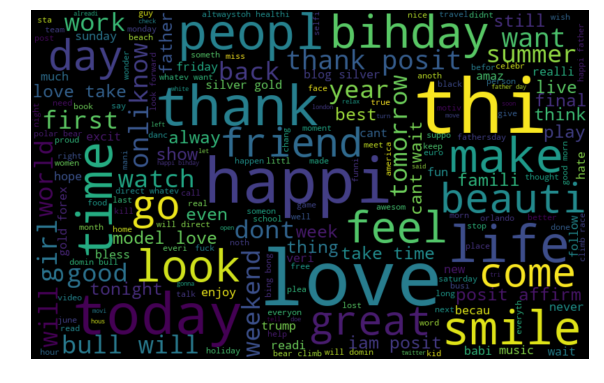

In [20]:
# Use word cloud to find common words in text
all_words = " ".join([tweet for tweet in df_combined["cleaned_tweet"]])

from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### words in non hate speech

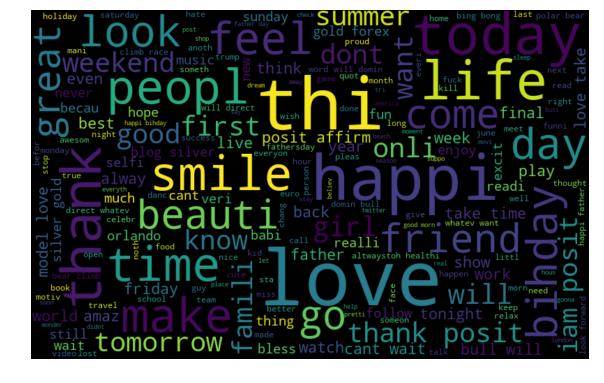

In [22]:
# Use word cloud to find common words in text
all_words = " ".join([tweet for tweet in df_combined.query("label == 0")["cleaned_tweet"]])

from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### words in racist/sexist tweets

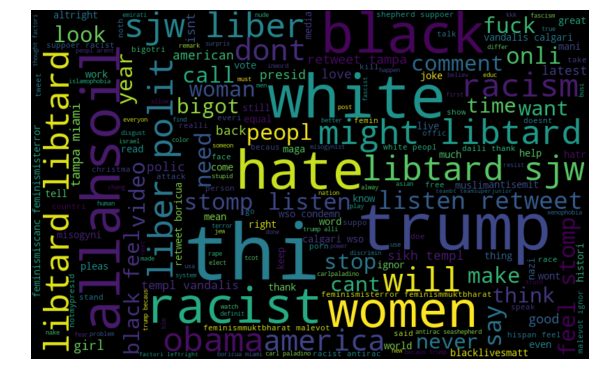

In [23]:
# Use word cloud to find common words in text
all_words = " ".join([tweet for tweet in df_combined.query("label == 1")["cleaned_tweet"]])

from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Understanding impact of hashtag in tweet sentiments

In [0]:
# Method to Extract hashtags
def extract_hashtag(series):
  
  hashtags = []
  
  for string in series:
    hashtag = re.findall(r'#(\w+)', string)
    
    hashtags.extend(hashtag)
    
  return hashtags

In [0]:
# Extract hashtags from hate speech tweets
hashtag_hate = extract_hashtag(df_combined.query("label == 1")["cleaned_tweet"])

# Extract hashtags from non hate(regular) speech tweets
hashtag_regular = extract_hashtag(df_combined.query("label == 0")["cleaned_tweet"])

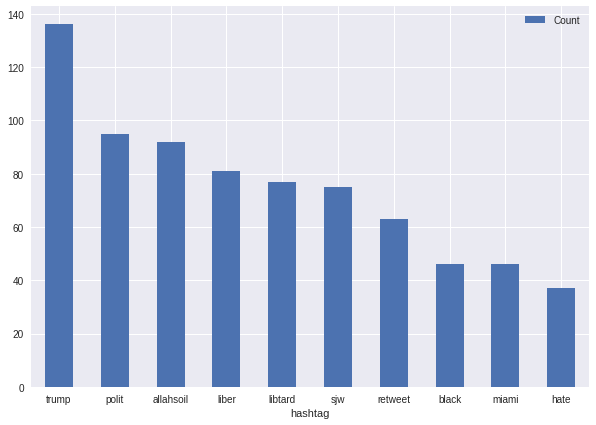

In [39]:
# Bar plot for racist/sexist hashtags

df = pd.DataFrame({"hashtag":hashtag_hate})

df = df.groupby("hashtag").size().reset_index(name="Count")
df = df.nlargest(columns="Count", n=10)

df.plot(kind="bar", x="hashtag", figsize=(10, 7), rot="0")

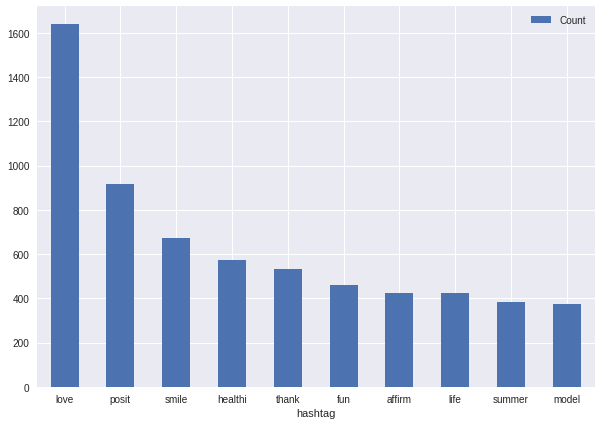

In [40]:
# Bar plot for non racist/sexist hashtags

df = pd.DataFrame({"hashtag":hashtag_regular})

df = df.groupby("hashtag").size().reset_index(name="Count")
df = df.nlargest(columns="Count", n=10)

df.plot(kind="bar", x="hashtag", figsize=(10, 7), rot="0")

2019-03-08 17:25:35,589 DEBUG    root            Loaded Command Group: [u'gcloud', u'components']
2019-03-08 17:25:35,592 DEBUG    root            Loaded Command Group: [u'gcloud', u'components', u'update']
2019-03-08 17:25:35,595 DEBUG    root            Running [gcloud.components.update] with arguments: [--allow-no-backup: "True", --quiet: "True", COMPONENT-IDS:5: "[u'core', u'gcloud-deps', u'bq', u'gcloud', u'gsutil']"]
2019-03-08 17:25:36,635 INFO     ___FILE_ONLY___ 

2019-03-08 17:25:36,636 INFO     ___FILE_ONLY___ 
Your current Cloud SDK version is: 237.0.0

2019-03-08 17:25:36,636 INFO     ___FILE_ONLY___ Installing components from version: 237.0.0

2019-03-08 17:25:36,637 INFO     ___FILE_ONLY___ 

2019-03-08 17:25:36,644 INFO     ___FILE_ONLY___ +----------------------------------------------------------------------------+
2019-03-08 17:25:36,644 INFO     ___FILE_ONLY___ 

2019-03-08 17:25:36,644 INFO     ___FILE_ONLY___ |                    These components will be installed